In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [2]:
# Cargar los datos
train_data = pd.read_csv("trainC.csv")

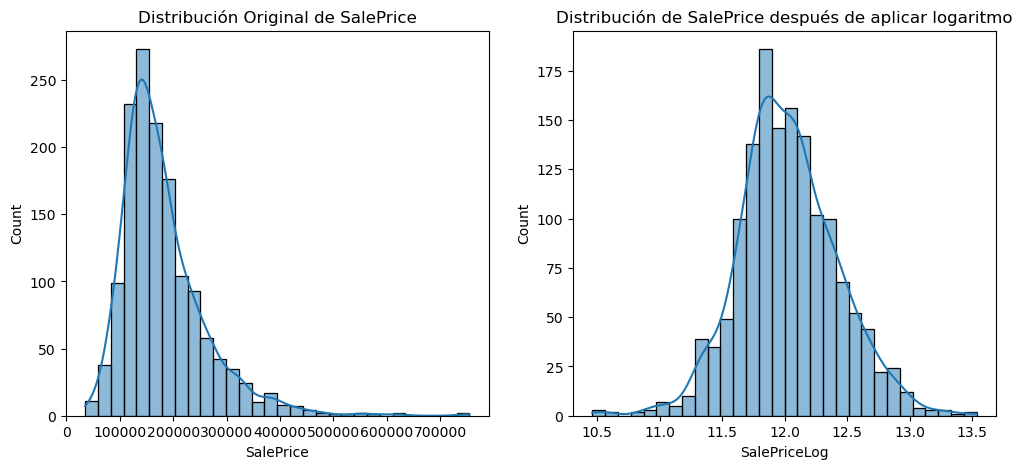

In [3]:
# 📌 Visualización: Distribución de SalePrice antes y después del logaritmo
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.histplot(train_data["SalePrice"], bins=30, kde=True)
plt.title("Distribución Original de SalePrice")

train_data["SalePriceLog"] = np.log(train_data["SalePrice"])

plt.subplot(1,2,2)
sns.histplot(train_data["SalePriceLog"], bins=30, kde=True)
plt.title("Distribución de SalePrice después de aplicar logaritmo")

plt.show()

In [4]:
# 📌 Visualización: Matriz de correlación
plt.figure(figsize=(10, 6))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlación de Variables con SalePrice")
plt.show()


ValueError: could not convert string to float: 'RL'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Seleccionar características más importantes
selected_features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", 
                     "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", 
                     "YearBuilt", "YearRemodAdd", "Neighborhood", "HouseStyle", 
                     "KitchenQual", "SaleCondition"]

In [ ]:
# Definir variables predictoras y objetivo
X = train_data[selected_features]
y = train_data["SalePriceLog"]  

In [ ]:
# Identificar variables numéricas y categóricas
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Dividir en datos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)])

In [ ]:
# Definir el modelo XGBoost
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, subsample=0.8, colsample_bytree=0.8, random_state=42)

pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor), ('model', xgb_model)])


In [ ]:
# Entrenar el modelo
pipeline_xgb.fit(X_train, y_train)

In [ ]:
# Evaluar y mostrar resultados
y_pred_xgb = pipeline_xgb.predict(X_val)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
print(f"RMSE del modelo XGBoost: {rmse_xgb:.4f}")